In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
# frist date
df.query("(home_team == 'Egypt' or away_team == 'Egypt')and tournament != 'Friendly'")['date'].min()

'1934-03-16'

In [4]:
# last date
df.query("(home_team == 'Egypt' or away_team == 'Egypt')and tournament != 'Friendly'")['date'].max()

'2022-02-06'

In [5]:
# The official matches of the Egyptian national team from 1934 to 2022.
df_official = df.query("(home_team == 'Egypt' or away_team == 'Egypt') and tournament != 'Friendly'")
df_official.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1661,1934-03-16,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False
1670,1934-04-06,Israel,Egypt,1,4,FIFA World Cup qualification,Tel Aviv,Palestine,True
1695,1934-05-27,Egypt,Hungary,2,4,FIFA World Cup,Naples,Italy,True
3585,1953-11-13,Egypt,Italy,1,2,FIFA World Cup qualification,Cairo,Egypt,False
3602,1954-01-24,Italy,Egypt,5,1,FIFA World Cup qualification,Milan,Italy,False


In [6]:
#The number of official matches of the Egyptian national team from 1934 to 2022.
df_official.count()[0]


363

In [7]:
df_home_w = df_official.query("(home_team == 'Egypt') and (home_score > away_score)")
df_home_w.count()[0]

146

In [8]:
df_away_w = df_official.query("(away_team == 'Egypt') and (home_score < away_score)")
df_away_w.count()[0]

46

In [9]:
df_full_w = df_home_w.append(df_away_w)

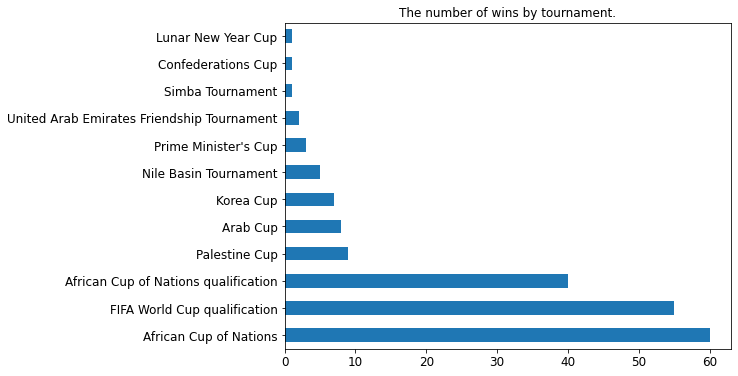

In [10]:
# The number of wins by tournament.
df_full_w['tournament'].value_counts().plot.barh(figsize=[8,6]);
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("The number of wins by tournament.");

In [11]:
# The number of wins by tournament.
df_full_w['tournament'].value_counts()

African Cup of Nations                        60
FIFA World Cup qualification                  55
African Cup of Nations qualification          40
Palestine Cup                                  9
Arab Cup                                       8
Korea Cup                                      7
Nile Basin Tournament                          5
Prime Minister's Cup                           3
United Arab Emirates Friendship Tournament     2
Simba Tournament                               1
Confederations Cup                             1
Lunar New Year Cup                             1
Name: tournament, dtype: int64

In [12]:
df_home_l = df_official.query("(home_team == 'Egypt') and (home_score < away_score)")
df_home_l.count()[0]

29

In [13]:
df_away_l = df_official.query("(away_team == 'Egypt') and (home_score > away_score)")
df_away_l.count()[0]

51

In [14]:
df_full_l = df_home_l.append(df_away_l)
df_full_l.count()[0]

80

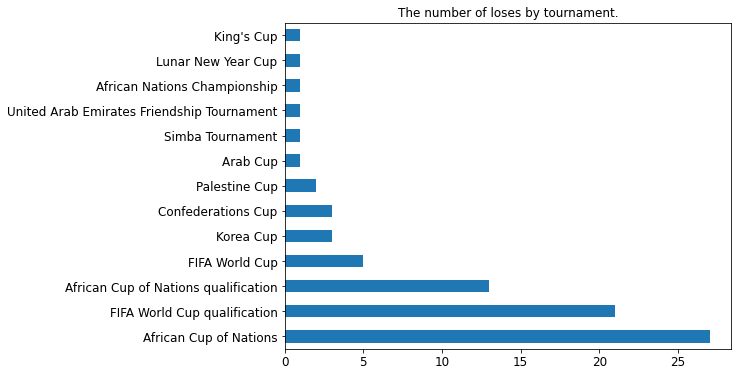

In [15]:
# The number of loses by tournament.
df_full_l['tournament'].value_counts().plot.barh(figsize=[8,6]);
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("The number of loses by tournament.");

In [16]:
df_full_l['tournament'].value_counts()

African Cup of Nations                        27
FIFA World Cup qualification                  21
African Cup of Nations qualification          13
FIFA World Cup                                 5
Korea Cup                                      3
Confederations Cup                             3
Palestine Cup                                  2
Arab Cup                                       1
Simba Tournament                               1
United Arab Emirates Friendship Tournament     1
African Nations Championship                   1
Lunar New Year Cup                             1
King's Cup                                     1
Name: tournament, dtype: int64

In [17]:
df_home_d = df_official.query("(home_team == 'Egypt') and (home_score == away_score)")
df_home_d.count()[0]

32

In [18]:
df_away_d = df_official.query("(away_team == 'Egypt') and (home_score == away_score)")
df_away_d.count()[0]

59

In [19]:
# Matches ending in a draw
df_full_d = df_home_d.append(df_away_d)
df_full_d.count()[0]

91

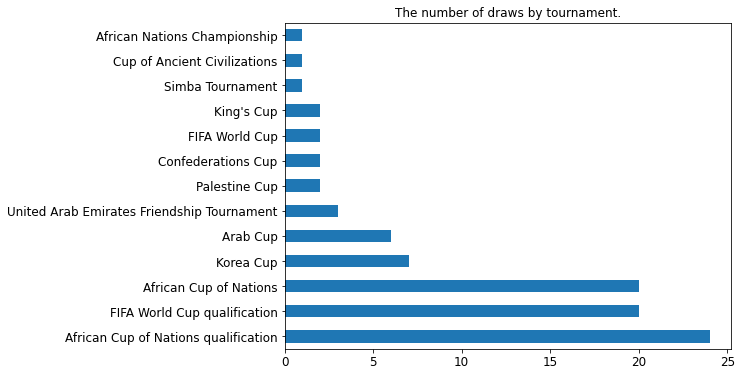

In [20]:
# The number of draws by tournament.
df_full_d['tournament'].value_counts().plot.barh(figsize=[8,6]);
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("The number of draws by tournament.");

In [21]:
df_full_d['tournament'].value_counts()

African Cup of Nations qualification          24
FIFA World Cup qualification                  20
African Cup of Nations                        20
Korea Cup                                      7
Arab Cup                                       6
United Arab Emirates Friendship Tournament     3
Palestine Cup                                  2
Confederations Cup                             2
FIFA World Cup                                 2
King's Cup                                     2
Simba Tournament                               1
Cup of Ancient Civilizations                   1
African Nations Championship                   1
Name: tournament, dtype: int64